In [55]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [56]:

api_key = "5l7UGiymQz76YzAwdfHh3R1GbDYKfXV4eousM5Ml"
lat, lng = 40.68439, -73.99566 # cnetroid of the shape NYC
# lat, lng = 33.0665, -116.94 # cnetroid of the shape San diego
system_capacity = 0.25  # kW
losses = 14.08  # %
array_type = 1  # 0	Fixed - Open Rack
                # 1	Fixed - Roof Mounted
                # 2	1-Axis
                # 3	1-Axis Backtracking
                # 4	2-Axis
module_type = 0  # 0	Standard
                  # 1	Premium
                  # 2	Thin Film
tilt = 20  # degrees
azimuth = 180  # degrees
dc_ac_ratio = 1.2 # inverter loading ratio
inv_eff = 96.0  # inverter efficiency %
gcr=0.4  # ground coverage ratio
albedo = 0.3 # ground reflectance
use_wf_albedo = 0  # use weather file albedo	
bifaciality = 0  # bifaciality factor
soiling = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # monthly soiling losses %
timeframe = "hourly" # hourly or monthly
url = "https://developer.nrel.gov/api/pvwatts/v8.json?api_key=" + api_key +\
    "&azimuth=" + str(azimuth) +\
    "&system_capacity=" + str(system_capacity) +\
    "&losses=" + str(losses) +\
    "&array_type=" + str(array_type) +\
    "&module_type=" + str(module_type) +\
    "&gcr=" + str(gcr) +\
    "&dc_ac_ratio=" + str(dc_ac_ratio) +\
    "&inv_eff=" + str(inv_eff) +\
    "&radius=0" +\
    "&dataset=nsrdb" +\
    "&tilt=" + str(tilt) +\
    "&lat=" + str(lat) +\
    "&lon=" + str(lng) +\
    "&soiling="+ "|".join([str(i) for i in soiling]) +\
    "&bifaciality=" + str(bifaciality) +\
    "&use_wf_albedo=" + str(use_wf_albedo) +\
    "&timeframe="   + timeframe
    # "&albedo=" + str(albedo) +\
response = requests.get(url)
response_json = response.json()
# response_json.get('outputs')
df_ny = pd.DataFrame({
    'month': range(1,13),
    'ac_monthly' : response_json.get('outputs').get('ac_monthly'),
    'poa_monthly' : response_json.get('outputs').get('poa_monthly'),
    'solrad_monthly' : response_json.get('outputs').get('solrad_monthly'),
    'dc_monthly' : response_json.get('outputs').get('dc_monthly'),
})
print('ac_annual:', response_json.get('outputs').get('ac_annual')) 
print('solrad_annual:', response_json.get('outputs').get('solrad_annual')) 
print('capacity_factor:', response_json.get('outputs').get('capacity_factor'))
print('ac_monthly sum:', df_ny.get('ac_monthly').sum())
# df.plot(x='month', y=['ac_monthly', 'poa_monthly', 'solrad_monthly', 'dc_monthly'], kind='bar', figsize=(10,6))
df_ny

ac_annual: 336.7946812387526
solrad_annual: 4.682656956672612
capacity_factor: 15.37875256797964
ac_monthly sum: 336.7946812387538


,month,ac_monthly,poa_monthly,solrad_monthly,dc_monthly
0,1,20.929580,97.483095,3.144616,21.900748
1,2,23.095818,109.110705,3.896811,24.148081
2,3,28.812591,140.566086,4.534390,30.183733
3,4,29.000518,146.952725,4.898424,30.363330
4,5,36.538817,189.040619,6.098084,38.193829
5,6,35.809033,190.046078,6.334869,37.429145
6,7,37.637171,202.524995,6.533064,39.336174
7,8,32.405025,174.618563,5.632857,33.893208
8,9,30.612875,159.223604,5.307453,31.997245
9,10,25.922436,130.555558,4.211470,27.110213


In [57]:
table_name = "PY1BLODWXA.T" #brooklyn station
area_svf_sum= 2564612.270000
area_svf_sum_ny = area_svf_sum
area = []
area_svf = []
with open('./coned_boundary/zonal_stats.geojson', 'r') as f:
    data = json.load(f)
    for feature in data.get('features'):
        area_svf.append(feature.get('properties').get('area_svf'))
        area.append(feature.get('properties').get('area'))
area_svf_sum = sum(area_svf)
print("area_svf",area_svf_sum)
print("area",sum(area))
print("reduction", 1-sum(area_svf)/sum(area))

area_svf 2564612.2700000056
area 2775995.2299999986
reduction 0.07614673026653329


In [58]:
consumption = pd.read_csv('./Auxillary Data/monthly_district/' + table_name + '.csv')
# ac_monthly in kWh
df_ny['consumption'] = consumption['reading']
df_ny["potential"] = df_ny['ac_monthly']*area_svf_sum*0.5*1e-3
consumption

,Unnamed: 0,meter_id,month,reading
0,0,PY1BLODWXA.T,1,110106.23400
1,1,PY1BLODWXA.T,2,100559.85800
2,2,PY1BLODWXA.T,3,106794.81200
3,3,PY1BLODWXA.T,4,99790.41255
4,4,PY1BLODWXA.T,5,106732.26540
5,5,PY1BLODWXA.T,6,121020.43350
6,6,PY1BLODWXA.T,7,146383.48820
7,7,PY1BLODWXA.T,8,126123.83450
8,8,PY1BLODWXA.T,9,111425.48833
9,9,PY1BLODWXA.T,10,76915.51118


In [59]:
# ac_monthly in kWh
df_ny['consumption'] = consumption['reading']
df_ny["potential"] = df_ny['ac_monthly']*area_svf_sum*0.5*1e-3
df_ny['consumption_'] = consumption['reading']/(area_svf_sum*1e-3)
df_ny["potential_"] = df_ny['ac_monthly']*0.5
# df_ny.plot(x='month', y=['consumption','potential'], kind='bar', figsize=(10,6))
print(df_ny['potential'].sum()/df_ny['consumption'].sum())
df_ny['potential']/df_ny['consumption']


0.3296609540220696


0     0.243748
1     0.294510
2     0.345958
3     0.372656
4     0.438986
5     0.379425
6     0.329698
7     0.329463
8     0.352299
9     0.432169
10    0.238526
11    0.215062
dtype: float64

In [60]:

api_key = "5l7UGiymQz76YzAwdfHh3R1GbDYKfXV4eousM5Ml"
# lat, lng = 40.68439, -73.99566 # cnetroid of the shape NYC
lat, lng = 33.0665, -116.94 # cnetroid of the shape San diego
system_capacity = 0.25  # kW
losses = 14.08  # %
array_type = 1  # 0	Fixed - Open Rack
                # 1	Fixed - Roof Mounted
                # 2	1-Axis
                # 3	1-Axis Backtracking
                # 4	2-Axis
module_type = 0  # 0	Standard
                  # 1	Premium
                  # 2	Thin Film
tilt = 20  # degrees
azimuth = 180  # degrees
dc_ac_ratio = 1.2 # inverter loading ratio
inv_eff = 96.0  # inverter efficiency %
gcr=0.4  # ground coverage ratio
albedo = 0.3 # ground reflectance
use_wf_albedo = 0  # use weather file albedo	
bifaciality = 0  # bifaciality factor
soiling = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # monthly soiling losses %
timeframe = "hourly" # hourly or monthly
url = "https://developer.nrel.gov/api/pvwatts/v8.json?api_key=" + api_key +\
    "&azimuth=" + str(azimuth) +\
    "&system_capacity=" + str(system_capacity) +\
    "&losses=" + str(losses) +\
    "&array_type=" + str(array_type) +\
    "&module_type=" + str(module_type) +\
    "&gcr=" + str(gcr) +\
    "&dc_ac_ratio=" + str(dc_ac_ratio) +\
    "&inv_eff=" + str(inv_eff) +\
    "&radius=0" +\
    "&dataset=nsrdb" +\
    "&tilt=" + str(tilt) +\
    "&lat=" + str(lat) +\
    "&lon=" + str(lng) +\
    "&soiling="+ "|".join([str(i) for i in soiling]) +\
    "&bifaciality=" + str(bifaciality) +\
    "&use_wf_albedo=" + str(use_wf_albedo) +\
    "&timeframe="   + timeframe
    # "&albedo=" + str(albedo) +\
response = requests.get(url)
response_json = response.json()
# response_json.get('outputs')

In [61]:
df_sd = pd.DataFrame({
    'month': range(1,13),
    'ac_monthly' : response_json.get('outputs').get('ac_monthly'),
    'poa_monthly' : response_json.get('outputs').get('poa_monthly'),
    'solrad_monthly' : response_json.get('outputs').get('solrad_monthly'),
    'dc_monthly' : response_json.get('outputs').get('dc_monthly'),
})
print('ac_annual:', response_json.get('outputs').get('ac_annual')) 
print('solrad_annual:', response_json.get('outputs').get('solrad_annual')) 
print('capacity_factor:', response_json.get('outputs').get('capacity_factor'))
print('ac_monthly sum:', df_sd.get('ac_monthly').sum())
# df.plot(x='month', y=['ac_monthly', 'poa_monthly', 'solrad_monthly', 'dc_monthly'], kind='bar', figsize=(10,6))
df_sd

ac_annual: 431.2610388972474
solrad_annual: 6.282298954118201
capacity_factor: 19.69228488115281
ac_monthly sum: 431.2610388972469


,month,ac_monthly,poa_monthly,solrad_monthly,dc_monthly
0,1,27.627262,138.997851,4.483802,28.869975
1,2,27.798553,142.051877,5.073281,29.036870
2,3,34.770446,182.497816,5.887026,36.335962
3,4,37.633428,199.611643,6.653721,39.313205
4,5,41.964144,225.017716,7.258636,43.824972
5,6,42.713013,233.340216,7.778007,44.603704
6,7,42.703330,234.082504,7.551049,44.600353
7,8,42.909156,236.819195,7.639329,44.802371
8,9,39.727855,217.214845,7.240495,41.468522
9,10,35.023989,188.380962,6.076805,36.572360


In [62]:
table_name = "SDGE_2024" #sd station
area_svf_sum= 10580904544.35501
area_svf_sum_sd = area_svf_sum
area = []
area_svf = []
with open('./ElectricLoadServingEntities_IOU_POU/zonal_stats.geojson', 'r') as f:
    data = json.load(f)
    for feature in data.get('features'):
        if feature.get('properties').get('area_svf') >0:
            area_svf.append(feature.get('properties').get('area_svf'))
            area.append(feature.get('properties').get('area'))
area_svf_sum = sum(area_svf)
print("area_svf",area_svf_sum)
print("area",sum(area))
print("reduction", 1-sum(area_svf)/sum(area))

area_svf 182626787.53999898
area 182798635.67999867
reduction 0.0009400953095761722


In [63]:
consumption = pd.read_csv('./Auxillary Data/monthly_district/' + table_name + '.csv')
consumption
# ac_monthly in kWh
df_sd['consumption'] = consumption['reading']
df_sd["potential"] = df_sd['ac_monthly']*area_svf_sum*0.5*1e-3
df_sd['consumption_'] = consumption['reading']/(area_svf_sum*1e-3)
df_sd["potential_"] = df_sd['ac_monthly']*0.5
# df.plot(x='month', y=['consumption','potential'], kind='bar', figsize=(10,6))
print(df_sd['potential'].sum()/df_sd['consumption'].sum())
df_sd['potential']/df_sd['consumption']


2.057744167564952


0     1.574041
1     1.717223
2     2.194135
3     2.544596
4     2.758277
5     2.620276
6     2.140468
7     2.022652
8     2.004798
9     1.918971
10    1.761251
11    1.633909
dtype: float64

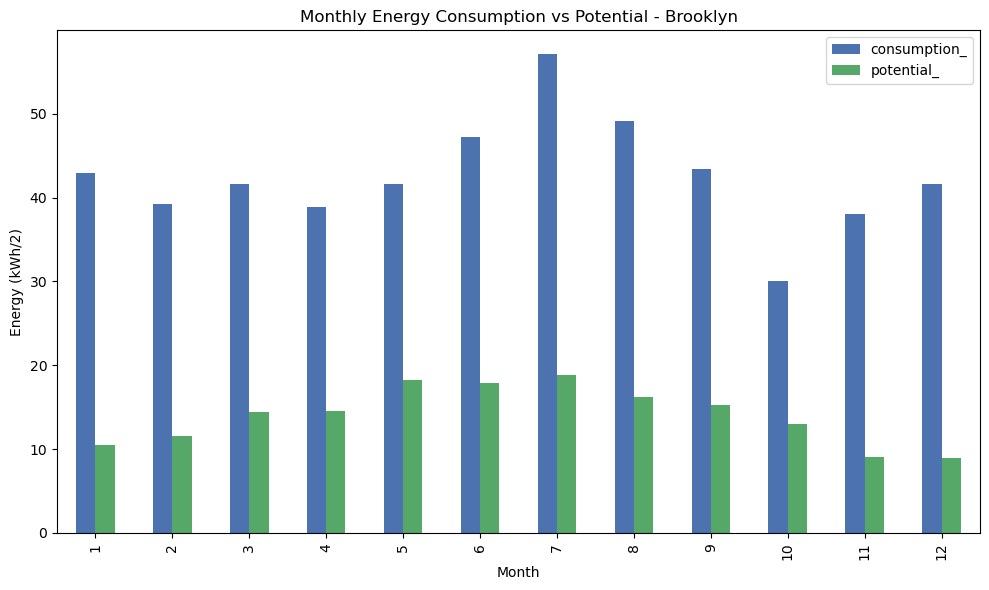

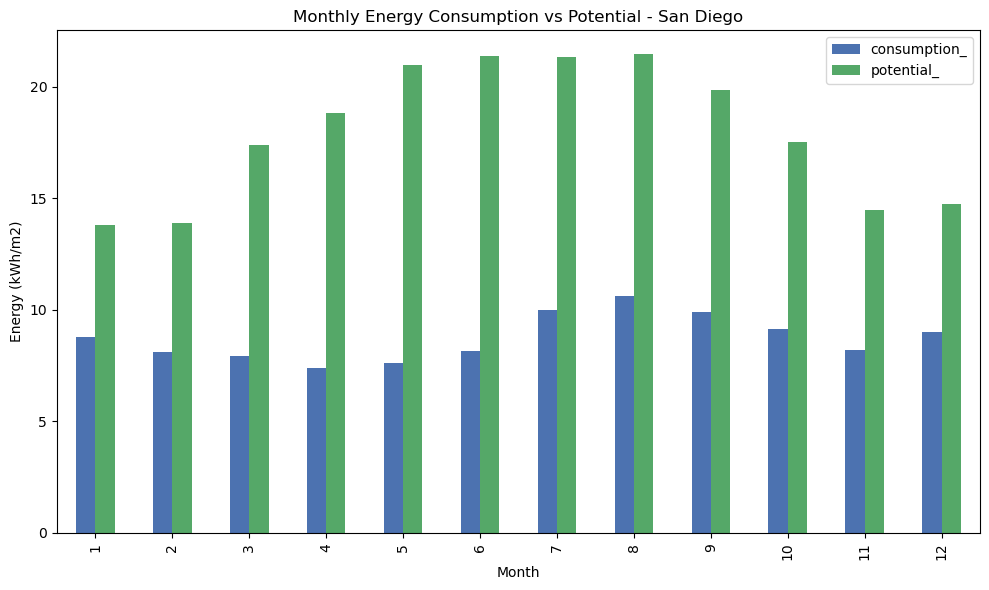

In [69]:

ax = df_ny.plot(
    x='month',
    y=['consumption_', 'potential_'],
    kind='bar',
    figsize=(10,6),
    color=['#4C72B0', '#55A868']
)

ax.set_xlabel('Month')        # título del eje X
ax.set_ylabel('Energy (kWh/2)') # título del eje Y
ax.set_title('Monthly Energy Consumption vs Potential - Brooklyn')  # título general

plt.tight_layout()
plt.show()

ax = df_sd.plot(
    x='month',
    y=['consumption_', 'potential_'],
    kind='bar',
    figsize=(10,6),
    color=['#4C72B0', '#55A868']
)

ax.set_xlabel('Month')        # título del eje X
ax.set_ylabel('Energy (kWh/m2)') # título del eje Y
ax.set_title('Monthly Energy Consumption vs Potential - San Diego')  # título general

plt.tight_layout()
plt.show()